# 導入需要用到的函式庫

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
from scipy.io import loadmat
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# 讀取"手寫數字"原始資料

In [2]:
mnist_raw = loadmat("mnist-original.mat")
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
    }

X,y = mnist['data'], mnist['target']

# 畫出前十筆Data

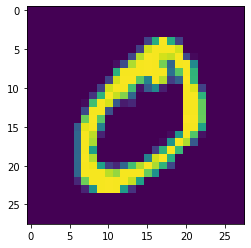

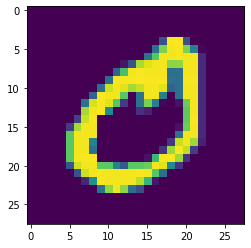

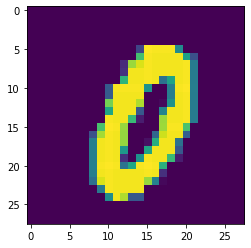

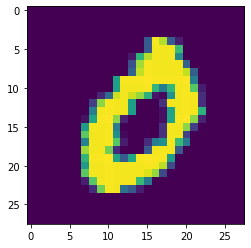

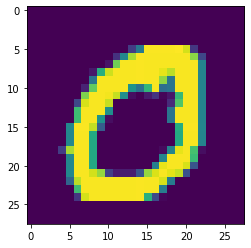

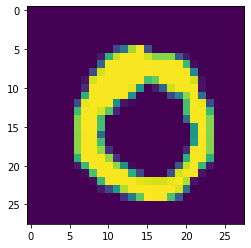

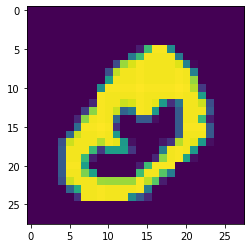

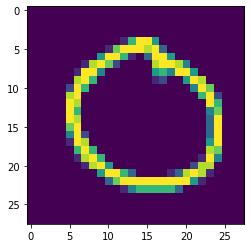

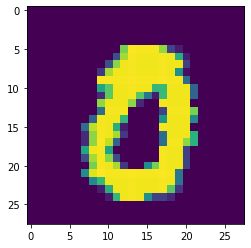

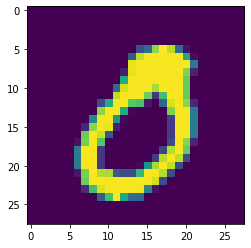

In [3]:
for i, x in enumerate(X):
    if i < 10:
        plt.imshow(x.reshape(28, 28))
        plt.show()

# 打亂資料

In [4]:
shuffle_index = np.random.permutation(70000)
X, y = X[shuffle_index], y[shuffle_index]

# 分割資料

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

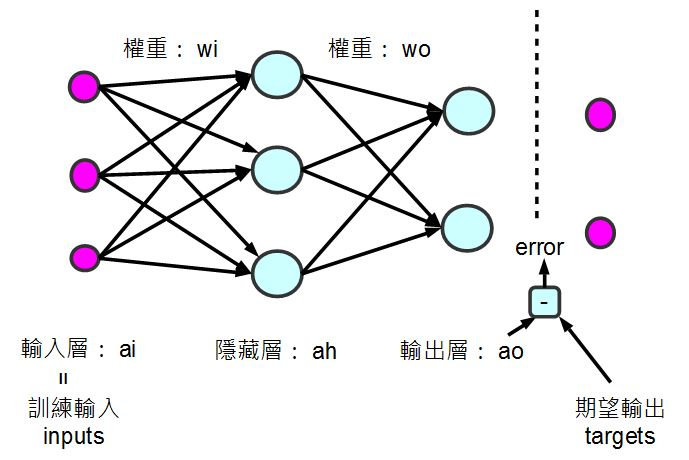

In [6]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), 
                    max_iter=30, 
                    alpha=1e-4,
                    solver='sgd', 
                    verbose=10, 
                    tol=1e-5, 
                    random_state=1,
                    learning_rate_init=0.001)

mlp.fit(X_train, y_train)

Iteration 1, loss = 1.97018509
Iteration 2, loss = 1.10710979
Iteration 3, loss = 0.74345621
Iteration 4, loss = 0.43244379
Iteration 5, loss = 0.35538429
Iteration 6, loss = 0.31678570
Iteration 7, loss = 0.29975087
Iteration 8, loss = 0.28315147
Iteration 9, loss = 0.27403680
Iteration 10, loss = 0.26434167
Iteration 11, loss = 0.25650382
Iteration 12, loss = 0.24827505
Iteration 13, loss = 0.24323800
Iteration 14, loss = 0.23688089
Iteration 15, loss = 0.23850374
Iteration 16, loss = 0.22922816
Iteration 17, loss = 0.22366295
Iteration 18, loss = 0.22275927
Iteration 19, loss = 0.22006410
Iteration 20, loss = 0.21585915
Iteration 21, loss = 0.21131620
Iteration 22, loss = 0.20789941
Iteration 23, loss = 0.20713564
Iteration 24, loss = 0.20580791
Iteration 25, loss = 0.20295688
Iteration 26, loss = 0.20038889
Iteration 27, loss = 0.20059016
Iteration 28, loss = 0.19475130
Iteration 29, loss = 0.19621548
Iteration 30, loss = 0.19345536


/home/frank/anaconda3/envs/Py3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=30, random_state=1, solver='sgd', tol=1e-05, verbose=10)

# 混淆矩陣

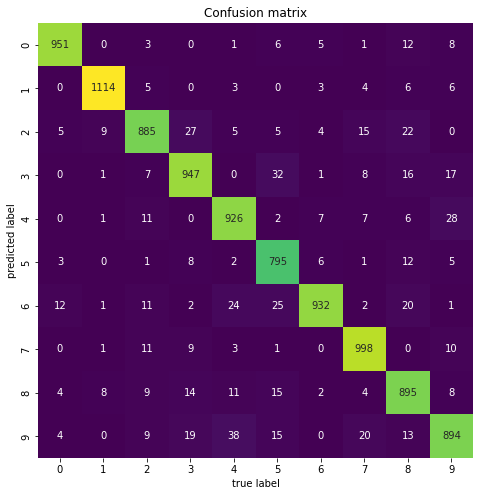

In [7]:
yfit = mlp.predict(X_test)
mat = confusion_matrix(y_test, yfit)


tn = ['0','1','2','3','4','5','6','7','8','9']
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='viridis',
            xticklabels=tn,
            yticklabels=tn,
            ax=ax)
plt.title('Confusion matrix')
plt.xlabel('true label')
plt.ylabel('predicted label');


# 準確率

In [8]:
print("Accuracy", accuracy_score(y_test, yfit)*100)

Accuracy 93.37


# 使用自己手寫的數字來做預測

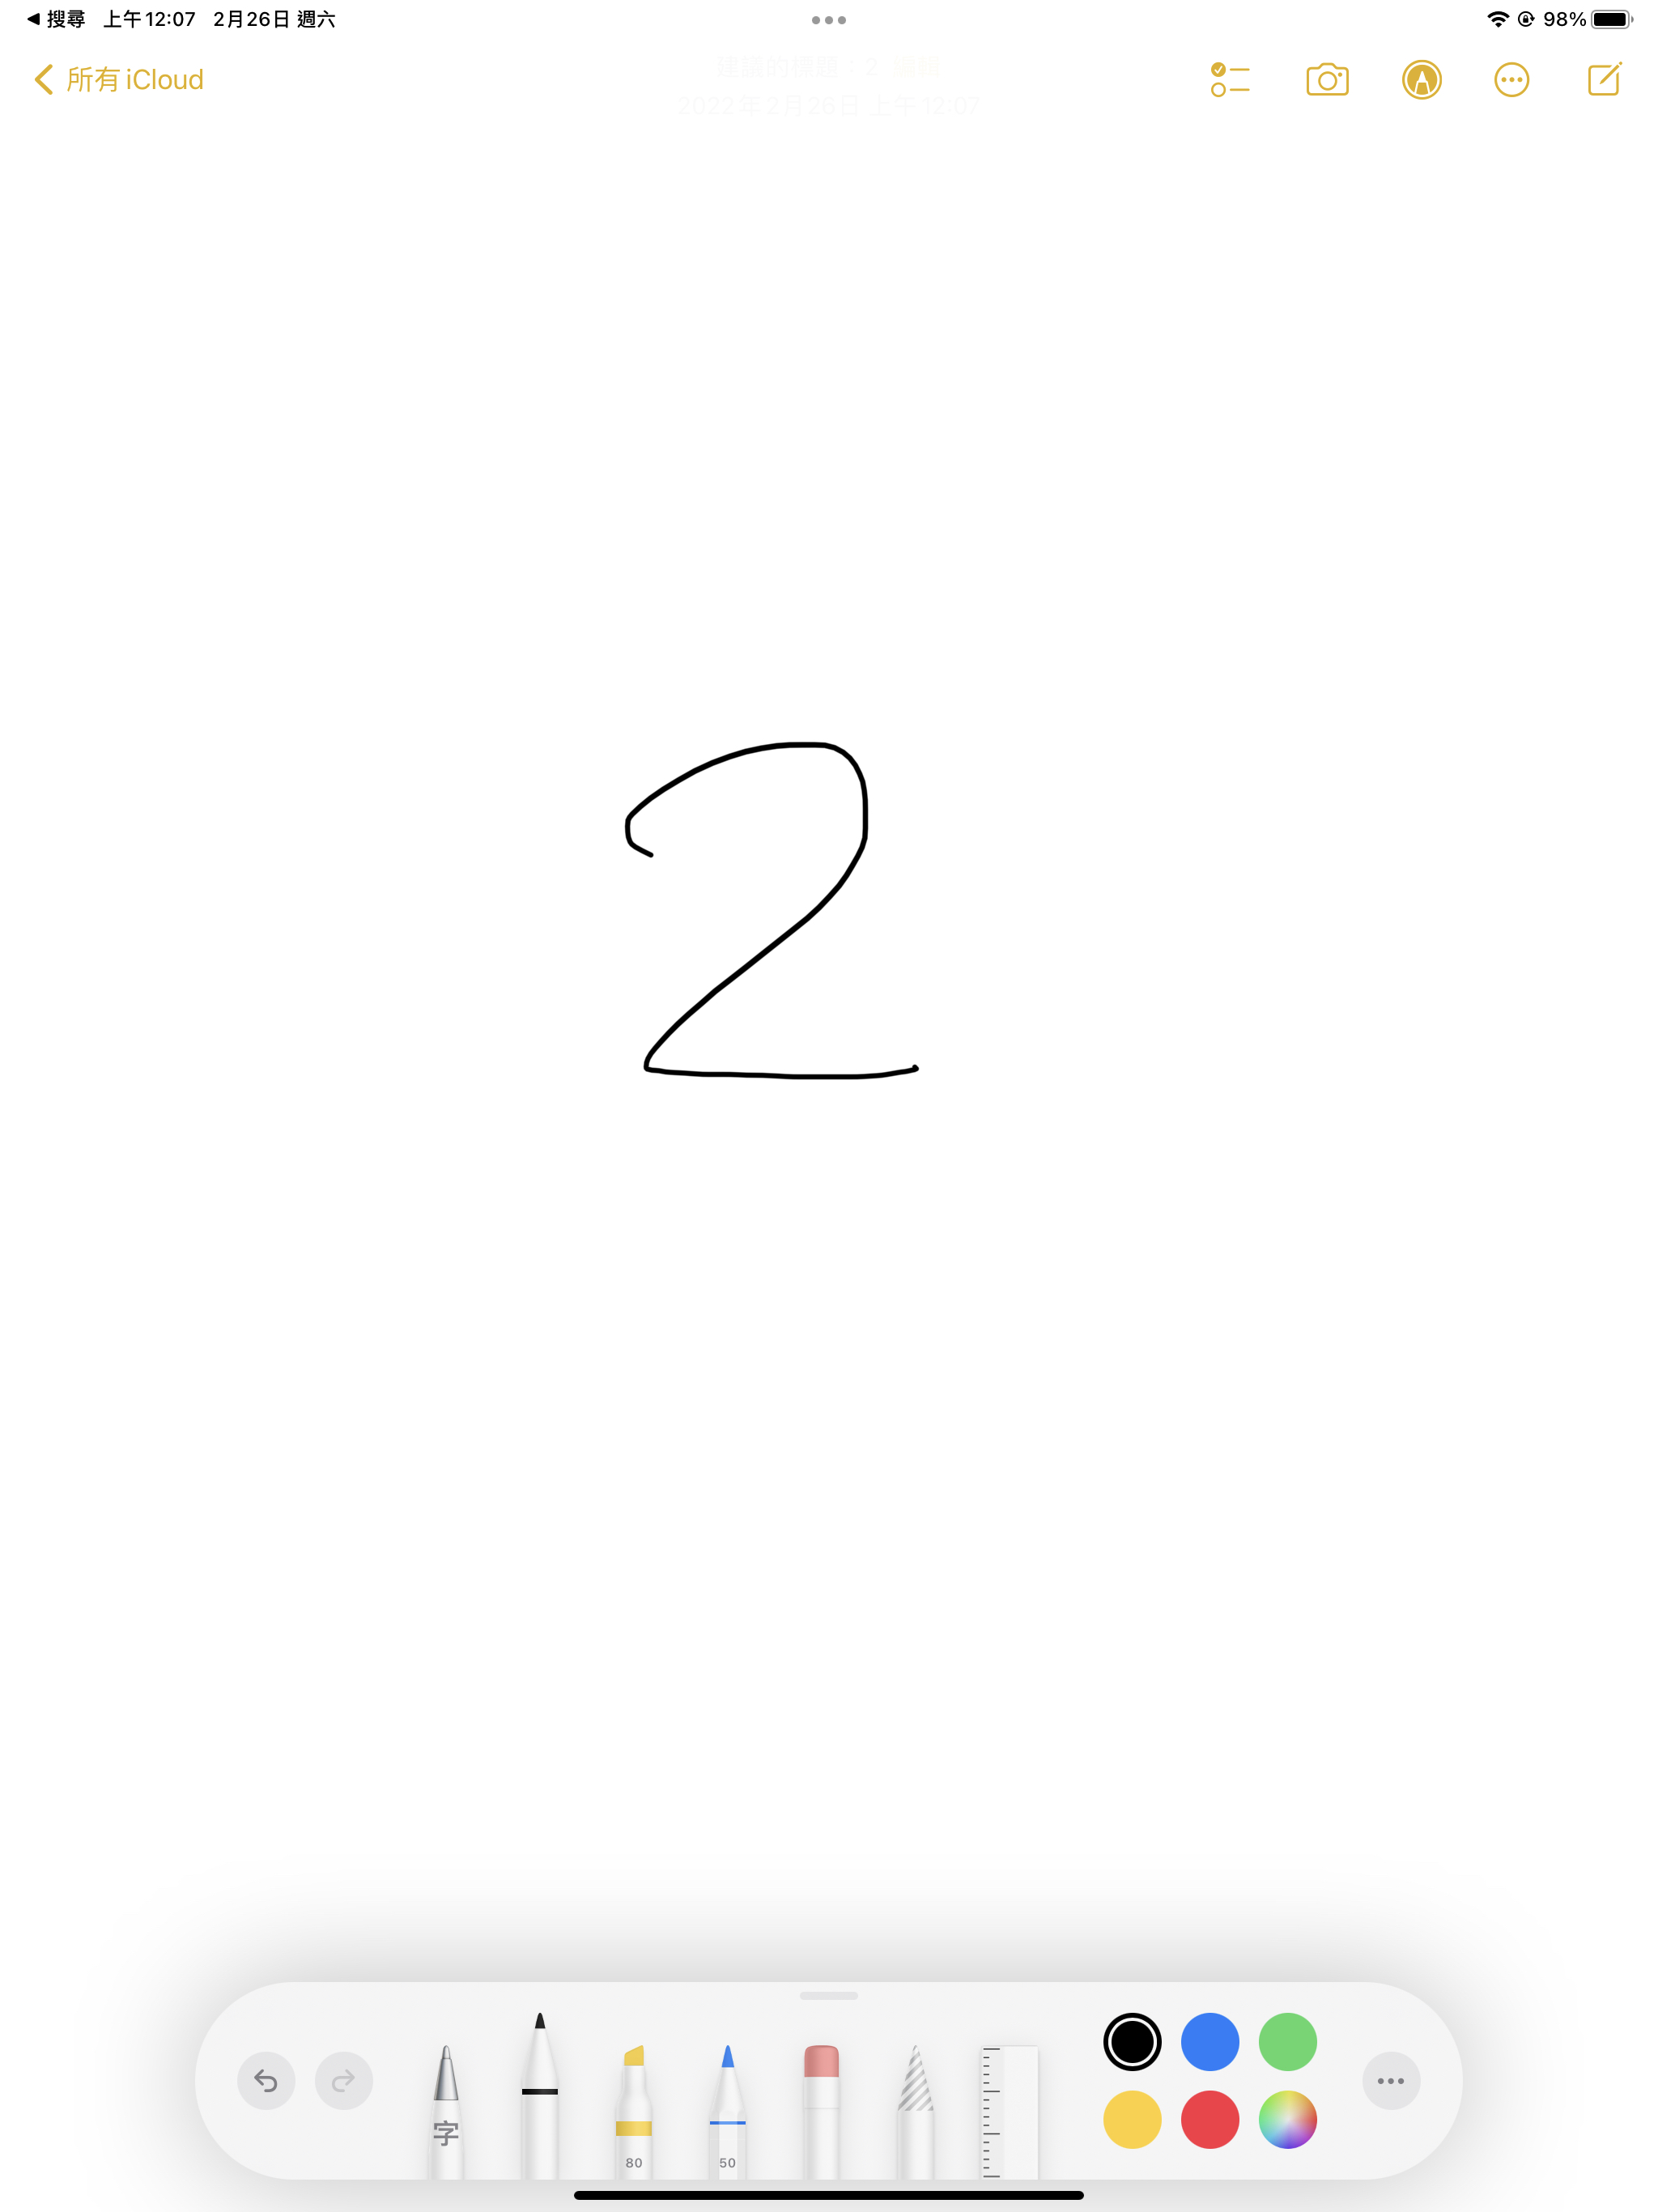

# 首先利用matplotlib印出自己的手寫數字圖片

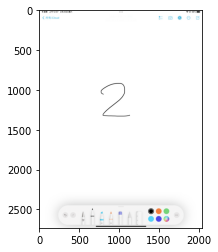

In [9]:
img = cv2.imread('2.jpg')
plt.imshow(img)
plt.show()

# 裁切原始圖片，並利用opencv儲存

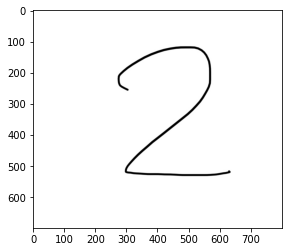

In [10]:
crop_img = img[800:1500, 500:1300, :]
cv2.imwrite('2_crop.jpg', crop_img)
plt.imshow(crop_img)

# 讀取剛剛儲存的圖片並resize成(28, 28)的大小

In [11]:
from PIL import Image

img = Image.open("2_crop.jpg")
resized_img = img.resize((28, 28))
resized_img.save("resized_image.jpg")

# 把resize過後的圖片轉成黑白

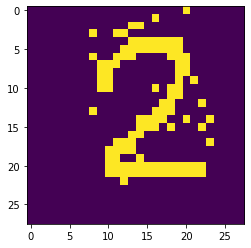

In [12]:
test_img = cv2.imread('resized_image.jpg')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

def convert_color(imgArray):
    for i in range(28):
        for j in range(28):
            if imgArray[i, j] >= 247:
                imgArray[i, j] = 0
            else:
                imgArray[i, j] = 255

    return imgArray

test_img = convert_color(test_img)
plt.imshow(test_img)

# 把處理好後的圖片傳入模型預測

In [13]:
print(f'預測結果: {mlp.predict(test_img.reshape(1, -1))[0]}')

預測結果: 2.0
